In [1]:
from Neuron_analysis_tool.Analyzer import Analyzer, long_pulse_protocol, short_pulse_protocol
from Neuron_analysis_tool.protocols import spike_protocol2, spike_protocol3
from Neuron_analysis_tool.utils import video_player
from neuron import gui, h
import numpy as np
import os
import matplotlib.pyplot as plt
from copy import deepcopy
from Neuron_analysis_tool.Video import create_movie_from_rec


NEURON: unable to open font "*helvetica-medium-r-normal*--14*", using "fixed"


## Loading  model

In [2]:

# analyser = Analyzer(type='Rall_tree')
# colors_dict  = analyser.colors_dict
# colors_dict['soma']='r'
# colors_dict['basal']='pink'

# analyser.change_color_dict(colors_dict)

analyser = Analyzer(type='L5PC')

In [3]:
def Ca_spike_protocol(cell, start_seg):
    delay=400.0
    stim = h.IClamp(0.5, sec=cell.soma[0])
    stim.dur   = 5
    stim.delay = delay

    syn = h.epsp(cell.apic[36](0.9))
    syn.tau0  = 0.5
    syn.tau1 = 5
    syn.onset   = stim.delay + 5
    syn.imax = 0.5 
    stim.amp = 1.9
    
    h.tstop = 400 + 150
    h.v_init = cell.soma[0].e_pas
    h.celsius = 37
    h.run()
    return 400, {}

## creating a movie of voltage response to a somatic stimulated spikes

In [4]:
show_records_from = dict()
show_records_from[list(analyser.cell.soma[0])[0]] = dict(label='soma', alpha=0.75, color='lime', size=50)
show_records_from[list(analyser.cell.apic[29])[-1]] = dict(label='tip', alpha=0.75, color='grey', size=50)


In [5]:
records, extra = analyser.record_protocol(protocol=Ca_spike_protocol, record_names=['v', 'gCa_LVAst_Ca_LVAst'], compute_more_condunctances=True)
record_dict = records.all_records['v']
record_dict2 = records.all_records['gCa_LVAst_Ca_LVAst']

more_conductances_ = extra['more_conductances']

In [10]:
start_seg = list(analyser.cell.soma[0])[0]
show_records_from = dict()
hot_spot_seg = list(analyser.cell.apic[36])[0]


duration= 3.0000000000007265
Moviepy - Building video check_temp.mp4.
Moviepy - Writing video check_temp.mp4



Moviepy - Done !
Moviepy - video ready check_temp.mp4


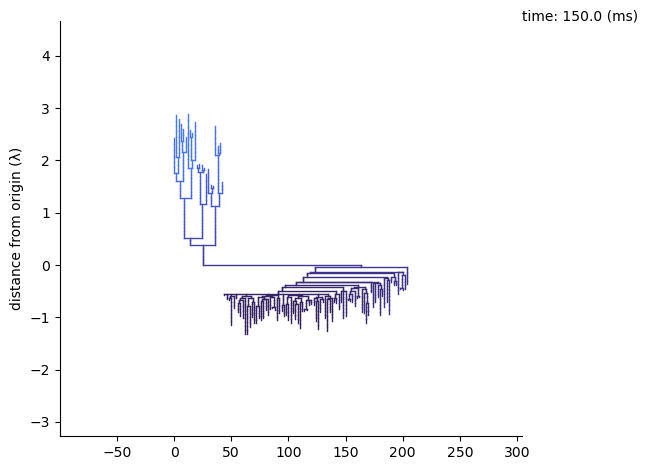

In [11]:
ax = plt.gca()
fig=ax.figure
plot_kwargs = [
    dict(ax=ax, seg = hot_spot_seg, records=record_dict, electrical=True, plot_type='dendogram', plot_color_bar=False, dancing=True, more_conductances_=more_conductances_),
              ]

slow_down_factor=20
animation = create_movie_from_rec(analyser, fig, slow_down_factor=slow_down_factor, plot_kwargs=plot_kwargs)
animation.write_videofile(os.path.join('', 'check_temp.mp4'),
                          fps=5, threads=4,
                          audio=False, preset='ultrafast')

# animation.ipython_display(fps=5, loop=True, autoplay=True, maxduration=animation.duration+10)

initiate_ax_attenuation: [-81.87401765440995, 40.14359752425179] 0
initiate_ax_attenuation: [3.865946510476773e-11, 0.00036611426355252785] 0
duration= 3.999999999999817
Moviepy - Building video multi_4.mp4.
Moviepy - Writing video multi_4.mp4



Moviepy - Done !
Moviepy - video ready multi_4.mp4


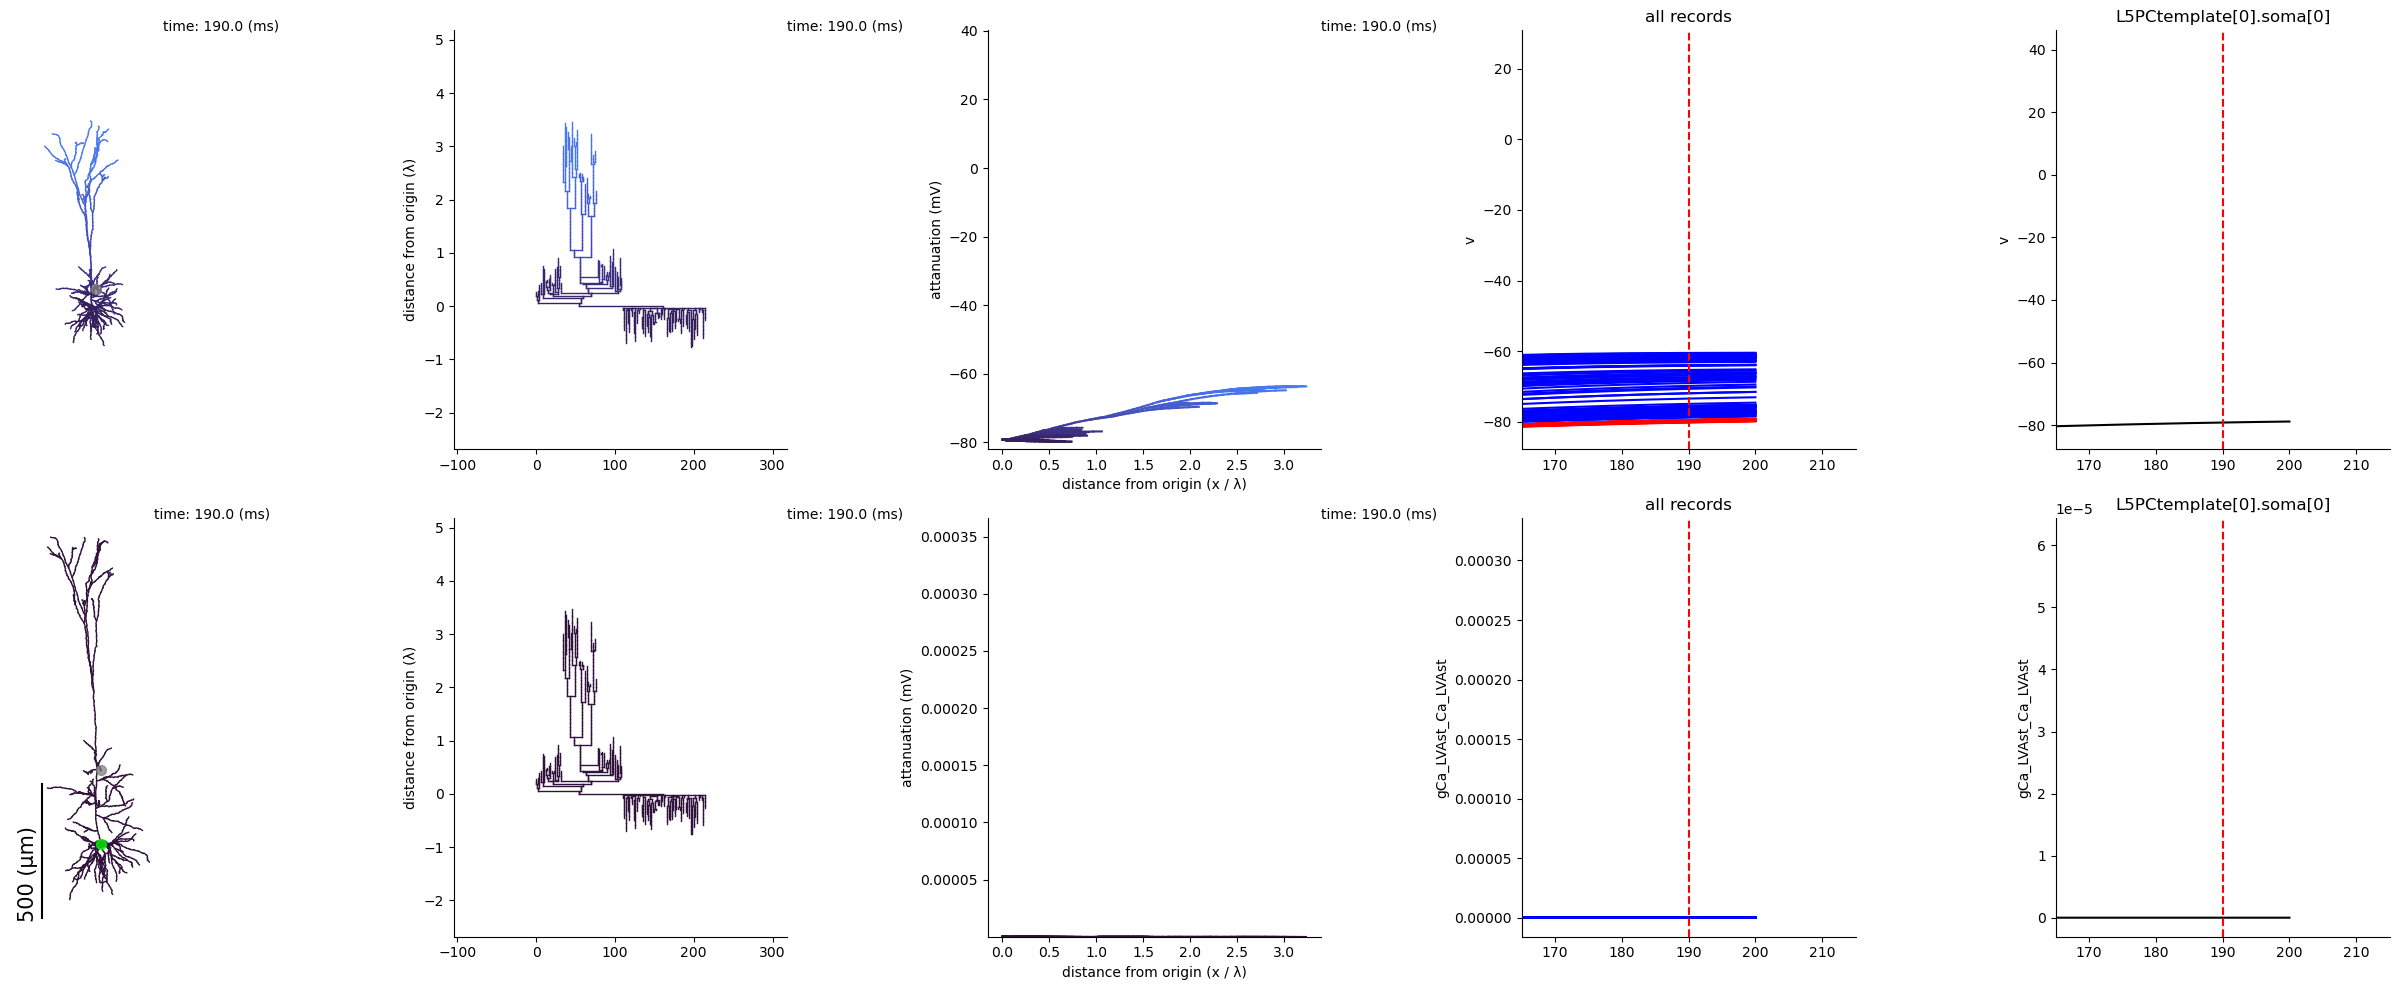

In [8]:
fig, ax = plt.subplots(2, 5, figsize=(25,10))

plot_kwargs = [
    dict(ax=ax[0, 0], seg = start_seg, records=record_dict, electrical=True, plot_type='morph', seg_to_indicate_dict=show_records_from,plot_color_bar=False, theta=270, dancing=True, more_conductances_=more_conductances_, scale=0),
    dict(ax=ax[0, 1], seg = start_seg, records=record_dict, electrical=True, plot_type='dendogram', plot_color_bar=False, dancing=True, more_conductances_=more_conductances_),
    dict(ax=ax[0, 2], seg = start_seg, records=record_dict, electrical=True, plot_type='attenuation'),
    dict(ax=ax[0, 3], seg = start_seg, records=record_dict, distance_factor=1, plot_every=0.25, plot_type='all_records'),
    dict(ax=ax[0, 4], seg = start_seg, records=record_dict, plot_type='single_record'),
    
    dict(ax=ax[1, 0], seg = start_seg, records=record_dict2, electrical=False, plot_type='morph', seg_to_indicate_dict=show_records_from,plot_color_bar=False, theta=270),
    dict(ax=ax[1, 1], seg = start_seg, records=record_dict2, electrical=True, plot_type='dendogram', plot_color_bar=False, dancing=True, more_conductances_=more_conductances_),
    dict(ax=ax[1, 2], seg = start_seg, records=record_dict2, electrical=True, plot_type='attenuation', margin=0),
    dict(ax=ax[1, 3], seg = start_seg, records=record_dict2, distance_factor=0, plot_every=0.25, plot_type='all_records'),
    dict(ax=ax[1, 4], seg = start_seg, records=record_dict2, plot_type='single_record'),

              ]

slow_down_factor=20
animation = create_movie_from_rec(analyser, fig, slow_down_factor=slow_down_factor, plot_kwargs=plot_kwargs)
animation.write_videofile(os.path.join('', 'multi_4.mp4'),
                          fps=5, threads=4,
                          audio=False, preset='ultrafast')

# animation.ipython_display(fps=5, loop=True, autoplay=True, maxduration=animation.duration+10)

In [11]:
records, extra = analyser.record_protocol(protocol=spike_protocol3,cut_start_ms=1000.0, record_names=['v', 'gCa_LVAst_Ca_LVAst'], compute_more_condunctances=True)
record_dict = records.all_records['v']
record_dict2 = records.all_records['gCa_LVAst_Ca_LVAst']

more_conductances_ = extra['more_conductances']

KeyboardInterrupt: 

duration= 10.74500000003909
0.0



                                                                                                                                                                                                            
t:  19%|█████████████████████████████                                                                                                                                | 10/54 [15:10<00:42,  1.03it/s, now=None]
                                                                                                                                                                                                            
t:  19%|█████████████████████████████                                                                                                                                | 10/54 [15:10<00:42,  1.03it/s, now=None]

Moviepy - Building video multi_1.mp4.
Moviepy - Writing video multi_1.mp4



t:   0%|                                                                                                                                                                      | 0/54 [00:00<?, ?it/s, now=None]

0.0


t:   4%|█████▊                                                                                                                                                        | 2/54 [00:00<00:22,  2.36it/s, now=None]

1.0


t:   6%|████████▊                                                                                                                                                     | 3/54 [00:01<00:32,  1.59it/s, now=None]

2.0


t:   7%|███████████▋                                                                                                                                                  | 4/54 [00:02<00:36,  1.36it/s, now=None]

3.0000000000000004


t:   9%|██████████████▋                                                                                                                                               | 5/54 [00:03<00:38,  1.28it/s, now=None]

4.0


t:  11%|█████████████████▌                                                                                                                                            | 6/54 [00:04<00:39,  1.21it/s, now=None]

5.0


t:  13%|████████████████████▍                                                                                                                                         | 7/54 [00:05<00:40,  1.16it/s, now=None]

6.000000000000001


t:  15%|███████████████████████▍                                                                                                                                      | 8/54 [00:06<00:40,  1.13it/s, now=None]

7.000000000000001


t:  17%|██████████████████████████▎                                                                                                                                   | 9/54 [00:07<00:40,  1.12it/s, now=None]

8.0


t:  19%|█████████████████████████████                                                                                                                                | 10/54 [00:08<00:39,  1.13it/s, now=None]

9.000000000000002


t:  20%|███████████████████████████████▉                                                                                                                             | 11/54 [00:08<00:38,  1.13it/s, now=None]

10.0


t:  22%|██████████████████████████████████▉                                                                                                                          | 12/54 [00:09<00:37,  1.13it/s, now=None]

11.000000000000002


t:  24%|█████████████████████████████████████▊                                                                                                                       | 13/54 [00:10<00:36,  1.12it/s, now=None]

12.000000000000002


t:  26%|████████████████████████████████████████▋                                                                                                                    | 14/54 [00:11<00:35,  1.13it/s, now=None]

13.000000000000002


t:  28%|███████████████████████████████████████████▌                                                                                                                 | 15/54 [00:12<00:34,  1.12it/s, now=None]

14.000000000000002


t:  30%|██████████████████████████████████████████████▌                                                                                                              | 16/54 [00:13<00:37,  1.02it/s, now=None]

15.0


t:  31%|█████████████████████████████████████████████████▍                                                                                                           | 17/54 [00:14<00:35,  1.05it/s, now=None]

16.0


t:  33%|████████████████████████████████████████████████████▎                                                                                                        | 18/54 [00:15<00:34,  1.06it/s, now=None]

17.0


t:  35%|███████████████████████████████████████████████████████▏                                                                                                     | 19/54 [00:16<00:32,  1.07it/s, now=None]

18.000000000000004


t:  37%|██████████████████████████████████████████████████████████▏                                                                                                  | 20/54 [00:17<00:31,  1.07it/s, now=None]

19.000000000000004


t:  39%|█████████████████████████████████████████████████████████████                                                                                                | 21/54 [00:18<00:30,  1.07it/s, now=None]

20.0


t:  41%|███████████████████████████████████████████████████████████████▉                                                                                             | 22/54 [00:19<00:30,  1.07it/s, now=None]

21.0


t:  43%|██████████████████████████████████████████████████████████████████▊                                                                                          | 23/54 [00:20<00:29,  1.06it/s, now=None]

22.000000000000004


t:  44%|█████████████████████████████████████████████████████████████████████▊                                                                                       | 24/54 [00:21<00:28,  1.07it/s, now=None]

23.000000000000004


t:  46%|████████████████████████████████████████████████████████████████████████▋                                                                                    | 25/54 [00:22<00:26,  1.09it/s, now=None]

24.000000000000004


t:  48%|███████████████████████████████████████████████████████████████████████████▌                                                                                 | 26/54 [00:22<00:25,  1.08it/s, now=None]

25.0


t:  50%|██████████████████████████████████████████████████████████████████████████████▌                                                                              | 27/54 [00:23<00:24,  1.10it/s, now=None]

26.000000000000004


t:  52%|█████████████████████████████████████████████████████████████████████████████████▍                                                                           | 28/54 [00:24<00:23,  1.11it/s, now=None]

27.000000000000004


t:  54%|████████████████████████████████████████████████████████████████████████████████████▎                                                                        | 29/54 [00:25<00:22,  1.13it/s, now=None]

28.000000000000004


t:  56%|███████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 30/54 [00:26<00:21,  1.12it/s, now=None]

29.000000000000004


t:  57%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 31/54 [00:27<00:20,  1.12it/s, now=None]

30.0


t:  59%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                | 32/54 [00:28<00:19,  1.13it/s, now=None]

31.0


t:  61%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                             | 33/54 [00:29<00:20,  1.05it/s, now=None]

32.0


t:  63%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 34/54 [00:30<00:18,  1.07it/s, now=None]

33.0


t:  65%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                       | 35/54 [00:31<00:17,  1.10it/s, now=None]

34.0


t:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 36/54 [00:31<00:16,  1.11it/s, now=None]

35.0


t:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 37/54 [00:32<00:15,  1.12it/s, now=None]

36.00000000000001


t:  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 38/54 [00:33<00:14,  1.11it/s, now=None]

37.00000000000001


t:  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 39/54 [00:34<00:13,  1.12it/s, now=None]

38.00000000000001


t:  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 40/54 [00:35<00:12,  1.11it/s, now=None]

39.00000000000001


t:  76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 41/54 [00:36<00:11,  1.13it/s, now=None]

40.0


t:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 42/54 [00:37<00:10,  1.12it/s, now=None]

41.00000000000001


t:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 43/54 [00:38<00:09,  1.14it/s, now=None]

42.0


t:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 44/54 [00:39<00:08,  1.14it/s, now=None]

43.0


t:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 45/54 [00:39<00:07,  1.14it/s, now=None]

44.00000000000001


t:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 46/54 [00:40<00:06,  1.15it/s, now=None]

45.0


t:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 47/54 [00:41<00:06,  1.14it/s, now=None]

46.00000000000001


t:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 48/54 [00:42<00:05,  1.14it/s, now=None]

47.0


t:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 49/54 [00:43<00:04,  1.15it/s, now=None]

48.00000000000001


t:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 50/54 [00:44<00:03,  1.06it/s, now=None]

49.0


t:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 51/54 [00:45<00:02,  1.09it/s, now=None]

50.0


t:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 52/54 [00:46<00:01,  1.11it/s, now=None]

51.00000000000001


t:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 53/54 [00:47<00:00,  1.13it/s, now=None]

52.00000000000001


t: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54/54 [00:47<00:00,  1.14it/s, now=None]

53.00000000000001


                                                                                                                                                                                                               
                                                                                                                                                                                                            
t:  19%|█████████████████████████████                                                                                                                                | 10/54 [15:59<00:42,  1.03it/s, now=None]
                                                                                                                                                                                                            
t:  19%|█████████████████████████████                                                                                                                                | 10/54 [

Moviepy - Done !
Moviepy - video ready multi_1.mp4
Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



t:   0%|                                                                                                                                                                      | 0/54 [00:00<?, ?it/s, now=None]

0.0


AssertionError: the time bins have no are not corect, t1=53.00000000000001, t2=0.0

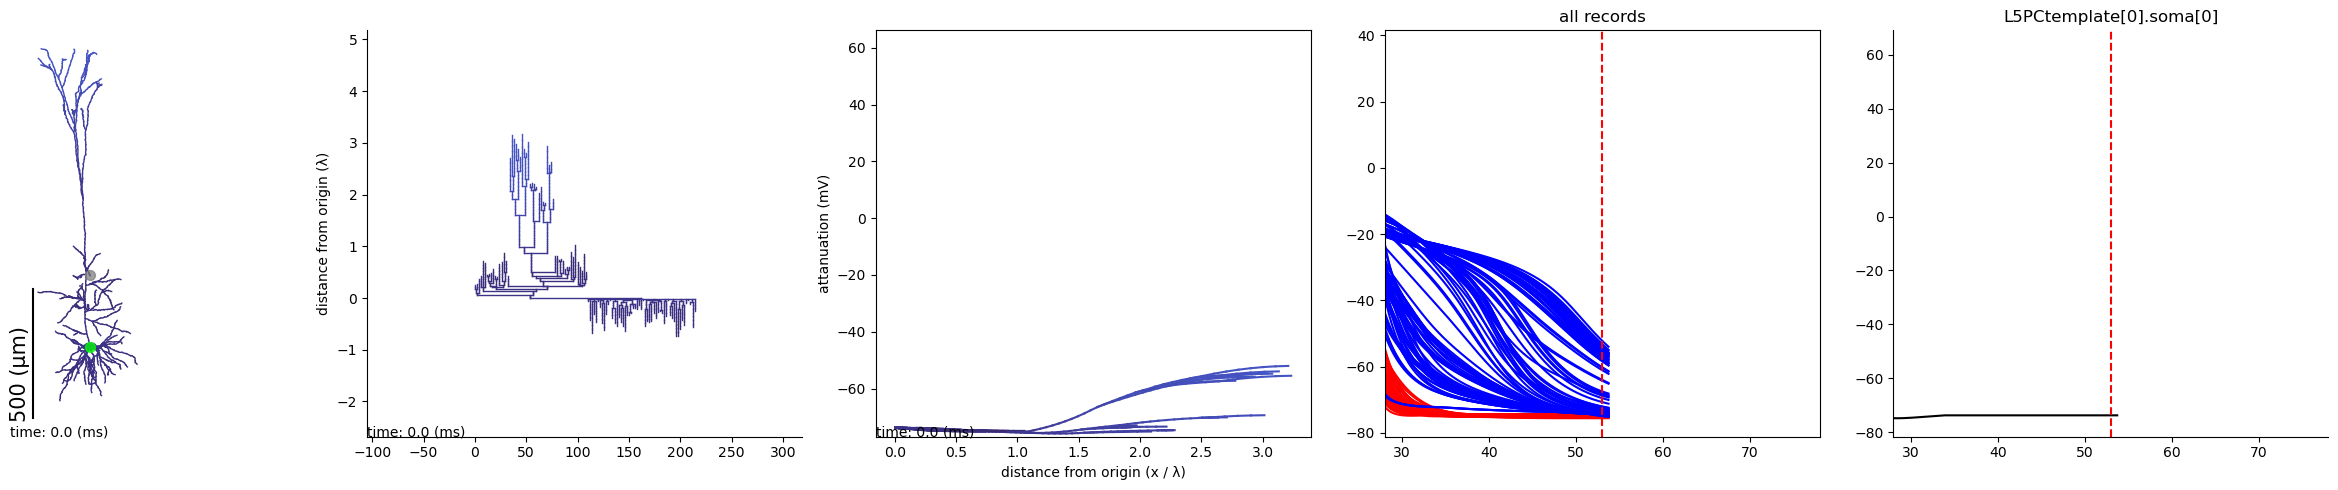

In [8]:
fig, ax = plt.subplots(1,5, figsize=(25,5))

plot_kwargs = [
    dict(ax=ax[0], seg = start_seg, records=record_dict, electrical=False, plot_type='morph', seg_to_indicate_dict=show_records_from,plot_color_bar=False, theta=270),
    dict(ax=ax[1], seg = start_seg, records=record_dict, electrical=True, plot_type='dendogram', plot_color_bar=False, dancing=True, more_conductances_=more_conductances_),
    dict(ax=ax[2], seg = start_seg, records=record_dict, electrical=True, plot_type='attenuation'),
    dict(ax=ax[3], seg = start_seg, records=record_dict, distance_factor=1, plot_every=0.25, plot_type='all_records'),
    dict(ax=ax[4], seg = start_seg, records=record_dict, plot_type='single_record'),
              ]

slow_down_factor=200
animation = create_movie_from_rec(analyser, fig, slow_down_factor=slow_down_factor, plot_kwargs=plot_kwargs)
animation.write_videofile(os.path.join('', 'multi_1.mp4'),
                          fps=5, threads=4,
                          audio=False, preset='ultrafast')

animation.ipython_display(fps=5, loop=True, autoplay=True, maxduration=animation.duration+10)

In [10]:
record_dict.time[0]

0.0

In [12]:
start_seg = list(analyser.cell.soma[0])[0]
show_records_from = dict()


In [13]:
def add_syn(seg, g_AMPA=0.0004, g_NMDA=0.0004):
    netstim = h.NetStim()
    netstim.interval = 400 # fr of 1
    netstim.start = 400
    netstim.noise = 1.0
    netstim.number = 0
    # AMPA part
    AMPA = h.Exp2Syn(seg.x, sec=seg.sec)
    AMPA_con= h.NetCon(netstim, AMPA)
    AMPA.e = 0
    AMPA.tau1 = 0.3
    AMPA.tau2 = 1.5
    AMPA_con.weight[0] = g_AMPA
    AMPA_con.delay = 0

    # NMDA part
    NMDA=h.NMDA(seg.x, sec=seg.sec)
    NMDA_con = h.NetCon(netstim, NMDA)
    NMDA.e = 0
    NMDA.tau_r_NMDA = 8
    NMDA.tau_d_NMDA = 35
    NMDA.n_NMDA = 0.27
    NMDA.gama_NMDA = 0.076
    NMDA_con.weight[0] = g_NMDA
    NMDA_con.delay = 0
    return [AMPA, AMPA_con], [NMDA, NMDA_con], netstim

def add_isyn(seg, g_GABA=0.0004):
    netstim = h.NetStim()
    netstim.interval = 500 # fr of 1
    netstim.start = 400
    netstim.noise = 1.0
    netstim.number = 0
    # AMPA part
    AMPA = h.Exp2Syn(seg.x, sec=seg.sec)
    AMPA_con= h.NetCon(netstim, AMPA)
    AMPA.e = -100
    AMPA.tau1 = 0.2
    AMPA.tau2 = 4
    AMPA_con.weight[0] = g_GABA
    AMPA_con.delay = 0

    return [AMPA, AMPA_con], netstim


def random_syn_protocol(cell, start_seg):
    syns = []
    isyns = []
    segs_e = []
    syn_e_times = []
    
    segs_i = []
    syn_i_times = []
    
    total_time = 1400
    start_time_=400
    number_of_e_syns = 5000
    number_of_i_syns = 2000
    
    amp=0
    e_FR = 2 #Hz
    i_FR = 2 #Hz
    #difining the synapses times
    sim_time = total_time-start_time_
    for sec in np.random.choice(list(cell.all), number_of_e_syns):
        
        seg_num = np.random.randint(0, len(list(sec)))
        segs_e.append(list(sec)[seg_num])
        syns.append(add_syn(list(sec)[seg_num]))
        syn_time = np.random.rand(int(np.ceil(sim_time/1000.0*e_FR))) * sim_time + start_time_
        syn_e_times.append(syn_time)

    for sec in np.random.choice(list(cell.all), number_of_i_syns):
        seg_num = np.random.randint(0, len(list(sec)))
        segs_i.append(list(sec)[seg_num])
        isyns.append(add_isyn(list(sec)[seg_num]))
        syn_time = np.random.rand(int(np.ceil(sim_time/1000.0*i_FR))) * sim_time + start_time_
        syn_i_times.append(syn_time)

    #function to insert synapse time to neuron
    def event_setter():
        for syn, times in zip(syns, syn_e_times):
            for t in times:
                syn[0][1].event(t) #AMPA netcon
                syn[1][1].event(t) #NMDA netcon          
        for syn, times in zip(isyns, syn_i_times):
            for t in times:
                syn[0][1].event(t) #GABA netcon
    
    # this function is return to the movie maker and is called every frame generation, than one can add stuff to the frame.
    # you must return all the new created items, so the function can call .remove() to remove this items in the next frame
    
    def draw_func1(start_time, end_time, segs, lines, ax, records):
        elements = []
        start_time+=start_time_
        end_time+=start_time_
        
        for seg, syn, times in zip(segs_e, syns, syn_e_times):
            for t in times:
                if t>start_time and t< end_time:
                    if seg in segs:
                        l = lines[segs==seg][0]
                        try:
                            elements.append(ax.scatter(l.get_xdata().mean(), l.get_ydata().mean(), color='r', alpha=0.75, s=10))
                        except:
                            pass
        for seg, syn, times in zip(segs_i, isyns, syn_i_times):
            for t in times:
                if t>start_time and t< end_time:
                    if seg in segs:
                        l = lines[segs==seg][0]
                        try:
                            elements.append(ax.scatter(l.get_xdata().mean(), l.get_ydata().mean(), color='b', alpha=0.75, s=10))
                        except:
                            pass
        return elements
        

    h.tstop = total_time
    h.v_init = cell.soma[0].e_pas
    h.celsius = 37
    fih=h.FInitializeHandler(0, event_setter)
    h.run()
    return start_time_, dict(draw_funcs=[draw_func1])

In [14]:
records, extra = analyser.record_protocol(protocol=random_syn_protocol, record_names=['v'], compute_more_condunctances=True)
record_dict = records.all_records['v']
more_conductances_ = extra['more_conductances']
draw_funcs = extra['draw_funcs']

duration= 100.00000000031287
Moviepy - Building video multi_synapses5.mp4.
Moviepy - Writing video multi_synapses5.mp4



Moviepy - Done !
Moviepy - video ready multi_synapses5.mp4


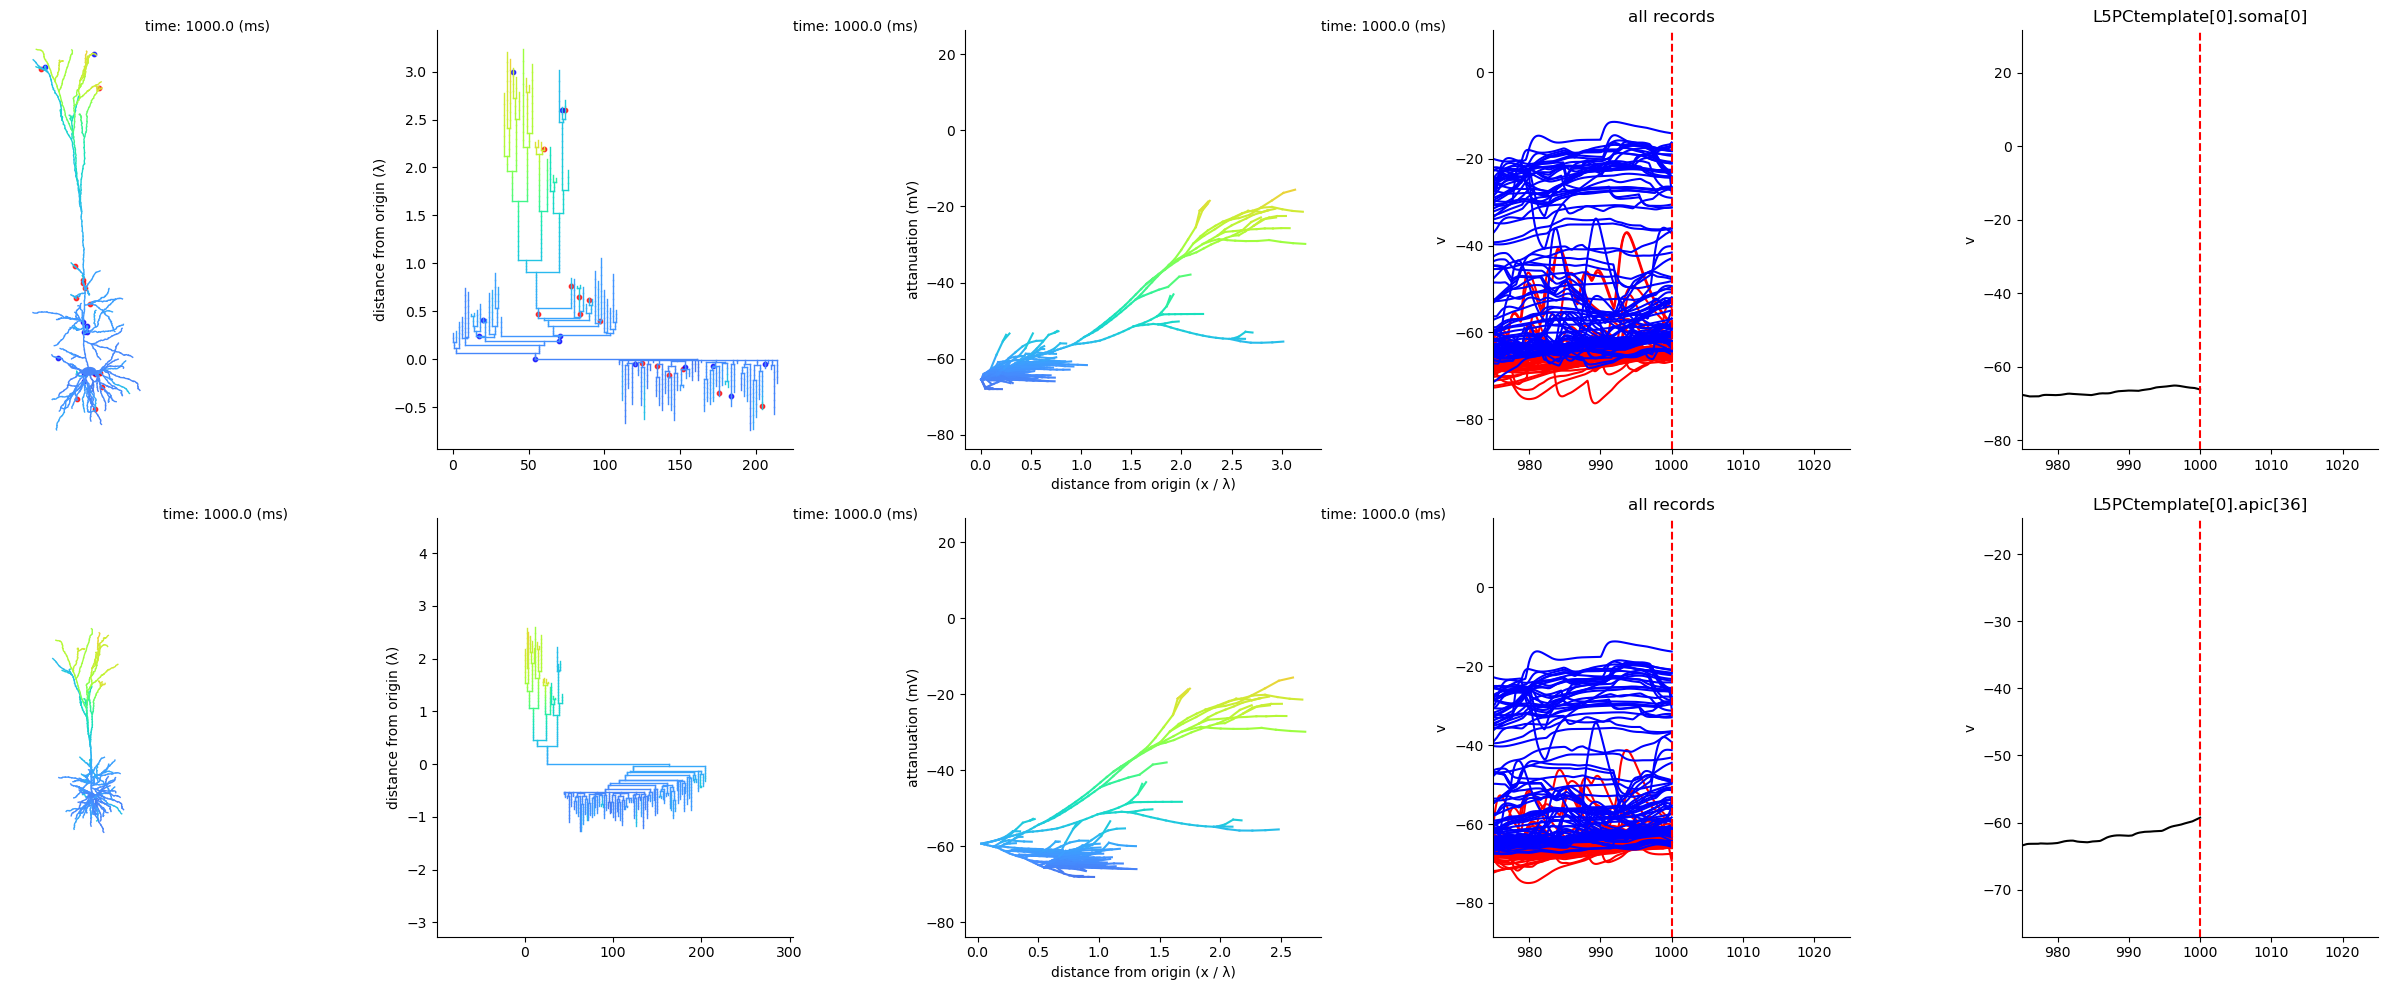

In [17]:
fig, ax = plt.subplots(2, 5, figsize=(25,10))
hot_spot_seg = list(analyser.cell.apic[36])[0]
plot_kwargs = [
    dict(ax=ax[0, 0], seg = start_seg, records=record_dict, electrical=False, plot_type='morph', seg_to_indicate_dict=show_records_from,plot_color_bar=False, theta=270, draw_funcs=draw_funcs),
    dict(ax=ax[0, 1], seg = start_seg, records=record_dict, electrical=True, plot_type='dendogram', plot_color_bar=False, dancing=False, draw_funcs=draw_funcs),
    dict(ax=ax[0, 2], seg = start_seg, records=record_dict, electrical=True, plot_type='attenuation'),
    dict(ax=ax[0, 3], seg = start_seg, records=record_dict, distance_factor=1, plot_every=0.25, plot_type='all_records'),
    dict(ax=ax[0, 4], seg = start_seg, records=record_dict, plot_type='single_record'),
    
    dict(ax=ax[1, 0], seg = hot_spot_seg, records=record_dict, electrical=True, plot_type='morph', seg_to_indicate_dict=show_records_from,plot_color_bar=False, theta=270, dancing=True, more_conductances_=more_conductances_),
    dict(ax=ax[1, 1], seg = hot_spot_seg, records=record_dict, electrical=True, plot_type='dendogram', plot_color_bar=False, dancing=True, more_conductances_=more_conductances_),
    dict(ax=ax[1, 2], seg = hot_spot_seg, records=record_dict, electrical=True, plot_type='attenuation', margin=0),
    dict(ax=ax[1, 3], seg = hot_spot_seg, records=record_dict, distance_factor=0, plot_every=0.25, plot_type='all_records'),
    dict(ax=ax[1, 4], seg = hot_spot_seg, records=record_dict, plot_type='single_record'),

              ]

slow_down_factor=100
animation = create_movie_from_rec(analyser, fig, slow_down_factor=slow_down_factor, plot_kwargs=plot_kwargs)
animation.write_videofile(os.path.join('', 'multi_synapses5.mp4'),
                          fps=5, 
                          threads=4,
                          audio=False, 
                          preset='slow', # 'ultrafast',
                          codec="mpeg4")

# animation.ipython_display(fps=5, loop=True, autoplay=True, maxduration=animation.duration+10)

In [13]:
analyser.last_t=0

In [16]:
analyser.last_t

0

In [13]:
hot_spot_seg

L5PCtemplate[0].apic[36](0.0384615)

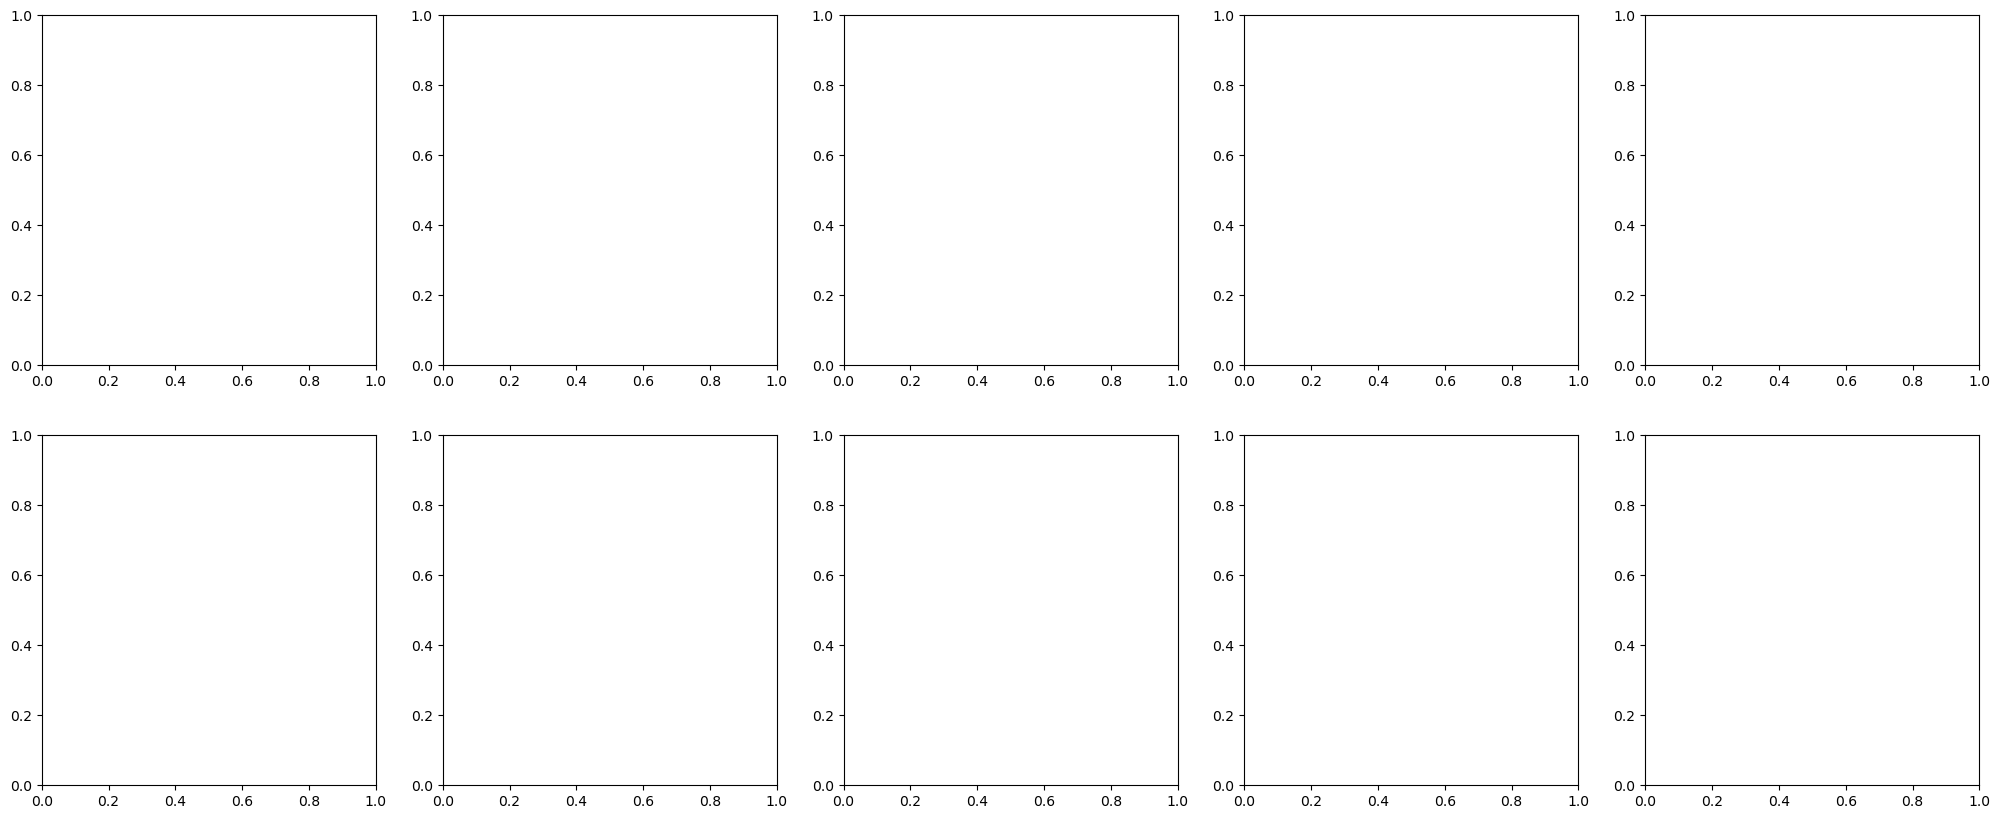

In [18]:
fig, ax = plt.subplots(2, 5, figsize=(25,10))


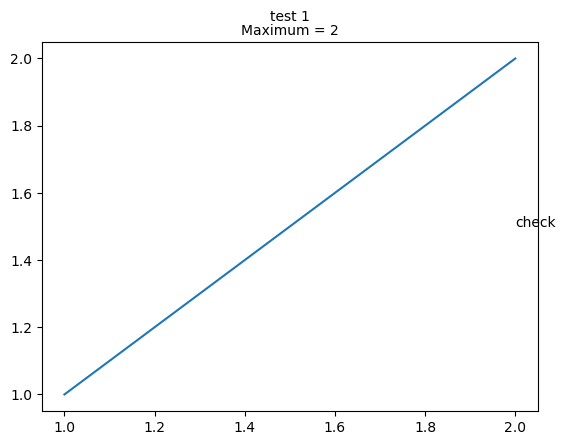

In [40]:
plt.plot([1,2], [1,2])
# plt.text(2, 1.5, 'check', wrap=True)
plt.annotate('check', (2, 1.5), )
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

maxpoint = [np.mean(xlim),2]
plt.annotate('Maximum = {:0.0f}'.format(maxpoint[1]), ha='center',
            size=10, xy=(maxpoint[0], 1), xytext=(0, 5),
            textcoords='offset points',
            xycoords=('data', 'axes fraction'))

a=plt.annotate('Maximum = {:0.0f}'.format(maxpoint[1]), ha='center',
            size=10, xy=(maxpoint[0], 1), xytext=(0, 15),
            textcoords='offset points',
            xycoords=('data', 'axes fraction'))
a.set_text('test 1')

In [41]:
from IPython.display import Video
Video.from_file("multi_synapses5.mp4")

AttributeError: type object 'Video' has no attribute 'from_file'

In [42]:
Video.reload("multi_synapses2.mp4")

In [43]:
from IPython.display.Video import Video

ModuleNotFoundError: No module named 'IPython.display.Video'; 'IPython.display' is not a package

In [44]:




video_player("multi_synapses2.mp4")

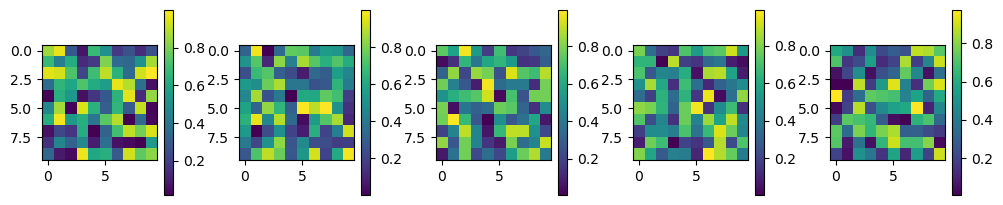

In [67]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 5, figsize=(10,4))
for a in ax:
        heatmap = a.imshow(np.random.rand(10, 10))
        plt.colorbar(heatmap, ax=a, shrink=0.5)
#         divider = make_axes_locatable(a)
#         cax = divider.append_axes('right', size="10%", pad=0.1)
        
        
#         cb = fig.colorbar(heatmap, cax=cax, orientation='vertical', fraction=0.1, shrink=0.5) #horizontal

plt.tight_layout()

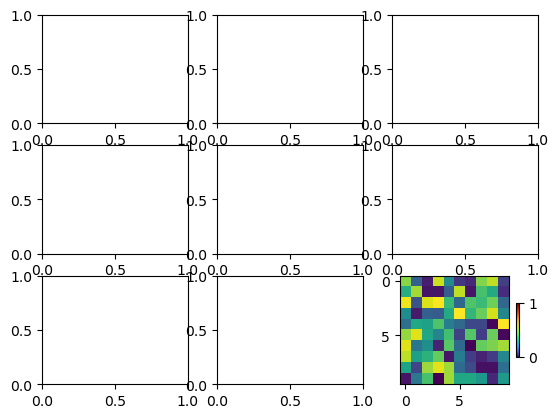

In [51]:
import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=0, vmax=1)
cmap = plt.cm.turbo
fig, axs = plt.subplots(3, 3)



im2 = axs[2, 2].imshow(np.random.rand(10, 10))
# cmap=colors.cmap, norm=colors.norm
im3=plt.cm.ScalarMappable(norm=norm, cmap=cmap)
cb=fig.colorbar(im3, ax=axs[2, 2], shrink=0.5)


In [35]:
cb

In [36]:
cb.ax

<AxesSubplot:label='<colorbar>'>

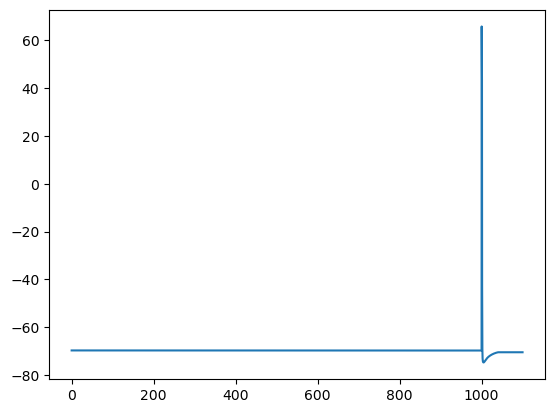

In [91]:
f='/ems/elsc-labs/segev-i/yoni.leibner/PycharmProjects/Neuron_analysis_tool/Neuron_analysis_tool'
spike_data = np.loadtxt(os.path.join(f, 'data/spike.txt'))
dt=spike_data.T[0][1]-spike_data.T[0][0]
v = spike_data.T[1][800:2400]
start_time = 1000
extra_end = 60
V = np.concatenate([np.zeros(int(start_time/dt))+spike_data.T[1][0]]+[v]+[np.zeros(int(extra_end/dt))+spike_data.T[1][-1]])
T = np.arange(0, len(V), 1) * dt
plt.plot(T, V)

In [86]:
spike_data.shape

(2400, 2)

In [79]:
import matplotlib.offsetbox
from matplotlib.lines import Line2D
import matplotlib

class AnchoredHScaleBar(matplotlib.offsetbox.AnchoredOffsetbox):
    """ size: length of bar in data units
        extent : height of bar ends in axes units """
    def __init__(self, size=1, size2=1, extent = 0.03, label="", label2="", loc=2, ax=None,
                 pad=0.4, borderpad=0.5, ppad = 0, sep=2, prop=None, 
                 frameon=True, linekw={}, **kwargs):
        
        if not ax:
            ax = plt.gca()
        trans = ax.get_xaxis_transform()
        size_bar = matplotlib.offsetbox.AuxTransformBox(trans)
        
        line = Line2D([0,size],[0,0], **linekw)
#         vline1 = Line2D([0,0],[-extent/2.,extent/2.], **linekw)
#         vline2 = Line2D([size,size],[-extent/2.,extent/2.], **linekw)
        
        line2 = Line2D([0,0], [0,size2], **linekw)
#         vline21 = Line2D([-extent/2.,extent/2.], [0,0], **linekw)
#         vline22 = Line2D([-extent/2.,extent/2.], [size2,size2], **linekw)
        
        size_bar.add_artist(line)
        size_bar.add_artist(line2)
        
#         size_bar.add_artist(vline1)
#         size_bar.add_artist(vline2)
        
        txt = matplotlib.offsetbox.TextArea(label, minimumdescent=False)
        txt2 = matplotlib.offsetbox.TextArea(label2, minimumdescent=False)
        
        self.vpac = matplotlib.offsetbox.VPacker(children=[size_bar,txt],  
                                 align="center", pad=ppad, sep=sep) 
        
        self.vpac2 = matplotlib.offsetbox.VPacker(children=[size_bar,txt2],  
                                 align="center", pad=ppad, sep=sep) 
        matplotlib.offsetbox.AnchoredOffsetbox.__init__(self, loc, pad=pad, 
                 borderpad=borderpad, child=self.vpac, prop=prop, frameon=frameon,
                 **kwargs)


In [55]:
from matplotlib_scalebar.scalebar import ScaleBar

In [7]:


LAMDA = '\u03BB'
MICRO = '\u03BC'

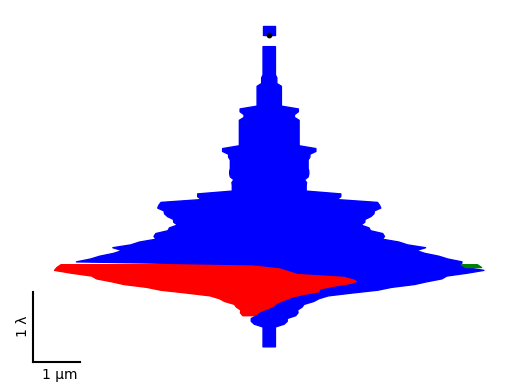

In [143]:
ax = plt.gca()
s=10
scales = dict(x=1, y=1)
start_seg = list(analyser.cell.soma[0])[0]
start_seg = list(analyser.cell.dend[28])[-1]
start_seg = list(analyser.cell.apic[67])[-1]
analyser.plot_cable(start_seg = start_seg, ax = ax,
                        factor_e_space = 25, factor_m_space = 10, segs_to_indecate = dict(),
                        ignore_sections = [], cable_type = 'd3_2', start_loc = 0, shift=0, x_axis = True,
                        factor = 1, dots_size = 10, start_color = 'k',
                        plot_legend = False, distance = None, extra = 5, cable_factor = 1, labal_start = None, 
                        return_shift = False, dt_func=lambda x: np.mean(x))
if (scales is not None) and ('x' in scales) and ('y' in scales):
    lim_x = ax.get_xlim()
    lim_y = ax.get_ylim()
#     x_range = abs(lim_x[1] - lim_x[0]) * 0.4
#     y_range = abs(lim_y[1] - lim_y[0]) * 0.4
#     lim_y = [lim_y[0] - y_range, lim_y[1] + y_range]
#     lim_x = [lim_x[0] - x_range, lim_x[1] + x_range]
    
    ax.set_axis_off()
    ax.plot([lim_x[0], lim_x[0]+scales['x']], [lim_y[0]]*2, color='k')
    ax.plot([lim_x[0]]*2, [lim_y[0], lim_y[0]+scales['y']], color='k')
    y_scale_text = str(scales['y']) +' '+ LAMDA
    x_scale_text = str(scales['x']) +' '+ MICRO + 'm'
    y_pos = lim_y[0]+scales['y']/2
    x_pos = lim_x[0]+scales['x']/2
    
#     ob = AnchoredHScaleBar(size=scales['x'], size2=scales['y'], label="2 units", label2='check', loc=2, frameon=True,
#                        pad=0.6,sep=4, linekw=dict(color="crimson"),ax=ax) 
#     ax.add_artist(ob)

    
#     ax.annotate(y_scale_text.format(y_pos), ha='center', 
#                 size=10, xy=(lim_x[0]-0.25, y_pos), 
#                 rotation=90)
    
#     ax.annotate(y_scale_text.format(y_pos), ha='center', 
#                 size=10, xy=(lim_x[0]-0.25, y_pos), xytext=(0, 0), textcoords='offset points', 
#                 xycoords=('data', 'axes fraction'), rotation=90)

# scalebar = ScaleBar(0.2, units='um') # 1 pixel = 0.2 meter
# plt.gca().add_artist(scalebar)

# scalebar2 = ScaleBar(0.2, rotation=90) # 1 pixel = 0.2 meter
# plt.gca().add_artist(scalebar2)

In [97]:
x_scale_text

'10μm'

In [99]:
x_pos

-2.40141661656755